# Case Study - London Housing

## Objectives

Here’s the mystery we’re going to solve: ***which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?***


A borough is just a fancy word for district. You may be familiar with the five boroughs of New York… well, there are 32 boroughs within Greater London [(here's some info for the curious)](https://en.wikipedia.org/wiki/London_boroughs). Some of them are more desirable areas to live in, and the data will reflect that with a greater rise in housing prices.

## The Data Science Pipeline

Data Science is magical. You can apply some simple or/and complex machine learning algorithms. But as  [David Spiegelhalter](https://www.youtube.com/watch?v=oUs1uvsz0Ok) reminds us, there is no substitute for simply **taking a really, really good look at the data.** Sometimes, this is all we need to answer our question.

Data Science projects generally adhere to the four stages of Data Science Pipeline:
1. Sourcing and loading 
2. Cleaning, transforming, and visualizing 
3. Modeling 
4. Evaluating and concluding 


### 1. Sourcing and Loading 

Any Data Science project typically kicks off by importing  ***pandas***. The documentation of this wonderful library can be found [here](https://pandas.pydata.org/). Pandas is also conveniently connected to the [Numpy](http://www.numpy.org/) and [Matplotlib](https://matplotlib.org/) libraries.

#### 1.1. Importing Libraries

In [1]:
# Let's import the pandas, numpy libraries as pd, and np respectively. 
# import numpy as np (In this case, we will not numpy)
import pandas as pd

# Load the pyplot collection of functions from matplotlib, as plt 
import matplotlib.pyplot as plt

# To print some colored text output:
class fontstyle:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   BRIGHTGREEN = '\033[32m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   BACKGROUNDYELLOW = '\033[43m'
   END = '\033[0m'

# Use the following to print colored and bold text
# print(fontstyle.BOLD + fontstyle.UNDERLINE +  fontstyle.CYAN + fontstyle.BACKGROUNDYELLOW + 'Hello World !' + fontstyle.END)


#### 1.2.  Loading the data
Your data comes from the [London Datastore](https://data.london.gov.uk/): a free, open-source data-sharing portal for London-oriented datasets. 

In [2]:
# First, make a variable called url_LondonHousePrices, and assign it the following link, enclosed in quotation-marks as a string:
# https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls

url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

# The dataset we're interested in contains the Average prices of the houses, and is actually on a particular sheet of the Excel file. 
# As a result, we need to specify the sheet name in the read_excel() method.
# Put this data into a variable called properties.  
properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)

### 2. Cleaning, transforming, and visualizing
This second stage is arguably the most important part of any Data Science project. The first thing to do is take a proper look at the data. Cleaning forms the majority of this stage, and can be done both before or after Transformation.

**The end goal of data cleaning is to have tidy data**.

#### 2.1. Exploring your data

Think about your pandas functions for checking out a dataframe. 

In [3]:
type(properties)

pandas.core.frame.DataFrame

In [4]:
properties.shape

(313, 49)

In [5]:
properties.head(3)

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,91448.98487,50460.2266,93284.51832,64958.09036,71306.56698,81671.47692,120932.8881,69158.16225,79885.89069,...,43958.48001,44803.42878,45544.52227,48527.52339,56701.5961,74435.76052,64018.87894,54705.1579,NaN,53202.77128
2,1995-02-01,82202.77314,51085.77983,93190.16963,64787.92069,72022.26197,81657.55944,119508.8622,68951.09542,80897.06551,...,43925.42289,44528.80721,46051.57066,49341.29029,56593.59475,72777.93709,63715.02399,54356.14843,NaN,53096.1549


In [6]:
properties.tail(3)

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
310,2020-10-01,813356.4347,305197.1134,534080.7256,346656.0968,523643.9032,444315.1934,831261.6466,378109.0962,495809.1709,...,179182.3297,176864.6494,207207.1422,211190.1262,303230.7665,492470.8594,337300.8331,275010.0002,NaN,262880.048
311,2020-11-01,788715.2761,306986.563,535055.2248,350585.4989,517569.185,455141.5982,837088.6982,381069.3,507206.2431,...,179327.671,180835.5672,209282.7916,212821.7394,303748.0129,501487.5626,340638.1159,276114.8617,NaN,265267.6641
312,2020-12-01,784005.6999,317946.9612,534719.1816,354466.1959,496316.2611,460361.1259,803908.4231,383292.5753,501050.8418,...,183726.8213,182906.7295,215046.3048,216950.3793,310912.16,496066.2203,341006.8611,282388.4646,NaN,269149.8106


In [7]:
properties.index

RangeIndex(start=0, stop=313, step=1)

In [8]:
properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            312 non-null    datetime64[ns]
 1   City of London        313 non-null    object        
 2   Barking & Dagenham    313 non-null    object        
 3   Barnet                313 non-null    object        
 4   Bexley                313 non-null    object        
 5   Brent                 313 non-null    object        
 6   Bromley               313 non-null    object        
 7   Camden                313 non-null    object        
 8   Croydon               313 non-null    object        
 9   Ealing                313 non-null    object        
 10  Enfield               313 non-null    object        
 11  Greenwich             313 non-null    object        
 12  Hackney               313 non-null    object        
 13  Hammersmith & Fulham

In [9]:
properties.describe()

,Unnamed: 34,Unnamed: 37,Unnamed: 47
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


#### <span>2.2. Cleaning the data without transpose </span>

 - [Section 2.2.1] First, delete/drop the first row of IDs since it will not be used in the ensuing analysis (at least in the current project context).
 - [Section 2.2.1] Then, delete all columns witn misssing elements (with NaN value). 
 - [Section 2.2.2] Next, make index of the dataframe Datetime index which will readily help you to extract the year-wise data for Average Monthly Price. The data of Average Monthly Price for each year can be then used for further analysis to compute yearly statistics etc (such average yearly price). 
 - [Section 2.2.3] Make all the Average Monthy Price data to float for numerical computation.
 - [Section 2.2.4] There are 32 London boroughs but number of columns in the data set is more than 32. So, indentify unique London boroughs from the Wikipedia link provided earlier, and then delete/drop all the relevant columns from the data set. This will be clean and tidy data set with London boroughs as your columns and datetime as index set.
 - [Section 2.2.5] Finally, before moving into the modeling part, summarize and plot some representative data for further exploration and understaning.

#### <span>**2.2.1. Dealing with one row of IDs and all columns having NaN elements**</span>

In [10]:
# Deleting/dropping the first row of IDs (not absolutely essential to use in the analysis)
properties = properties.drop([0])

In [11]:
# Exploring all columns with 'any' NaN elements
properties.loc[:, properties.isnull().any()] # Lesson02ManipulatingPandasDataframes_1.pdf

,Unnamed: 34,Unnamed: 37,Unnamed: 47
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN
...,...,...,...
308,NaN,NaN,NaN
309,NaN,NaN,NaN
310,NaN,NaN,NaN
311,NaN,NaN,NaN


In [12]:
# Deleting/dropping all columns with 'all' NaN elements
properties = properties.dropna(how='all', axis='columns') # Lesson02ManipulatingPandasDataframes_1.pdf
# properties = properties.drop(["Unnamed: 34", "Unnamed: 37", "Unnamed: 47"], axis=1)

In [13]:
properties.loc[:, properties.isnull().any()]

""
1
2
3
4
5
...
308
309
310
311


In [14]:
properties.head(3)

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH EAST,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,England
1,1995-01-01,91448.98487,50460.2266,93284.51832,64958.09036,71306.56698,81671.47692,120932.8881,69158.16225,79885.89069,...,42076.35411,43958.48001,44803.42878,45544.52227,48527.52339,56701.5961,74435.76052,64018.87894,54705.1579,53202.77128
2,1995-02-01,82202.77314,51085.77983,93190.16963,64787.92069,72022.26197,81657.55944,119508.8622,68951.09542,80897.06551,...,42571.98949,43925.42289,44528.80721,46051.57066,49341.29029,56593.59475,72777.93709,63715.02399,54356.14843,53096.1549
3,1995-03-01,79120.70256,51268.96956,92247.52435,64367.49344,72015.76274,81449.31143,120282.2131,68712.44341,81379.86288,...,42369.72984,44434.8681,45200.46775,45383.82395,49442.17973,56171.18278,73896.84204,64113.60858,53583.07667,53201.2843


In [15]:
properties.tail(3)

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH EAST,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,England
310,2020-10-01,813356.4347,305197.1134,534080.7256,346656.0968,523643.9032,444315.1934,831261.6466,378109.0962,495809.1709,...,136648.5737,179182.3297,176864.6494,207207.1422,211190.1262,303230.7665,492470.8594,337300.8331,275010.0002,262880.048
311,2020-11-01,788715.2761,306986.563,535055.2248,350585.4989,517569.185,455141.5982,837088.6982,381069.3,507206.2431,...,138459.5263,179327.671,180835.5672,209282.7916,212821.7394,303748.0129,501487.5626,340638.1159,276114.8617,265267.6641
312,2020-12-01,784005.6999,317946.9612,534719.1816,354466.1959,496316.2611,460361.1259,803908.4231,383292.5753,501050.8418,...,141154.4959,183726.8213,182906.7295,215046.3048,216950.3793,310912.16,496066.2203,341006.8611,282388.4646,269149.8106


#### <span>**2.2.2. Exploring and assigning index column**</span>

In [16]:
properties.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            303, 304, 305, 306, 307, 308, 309, 310, 311, 312],
           dtype='int64', length=312)

In [17]:
properties["Unnamed: 0"]

1     1995-01-01
2     1995-02-01
3     1995-03-01
4     1995-04-01
5     1995-05-01
         ...    
308   2020-08-01
309   2020-09-01
310   2020-10-01
311   2020-11-01
312   2020-12-01
Name: Unnamed: 0, Length: 312, dtype: datetime64[ns]

In [18]:
print(properties.index.name)

None


In [19]:
# Setting datetime column as index
properties.index = properties["Unnamed: 0"]

In [20]:
properties.index

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01',
               ...
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01',
               '2020-11-01', '2020-12-01'],
              dtype='datetime64[ns]', name='Unnamed: 0', length=312, freq=None)

In [21]:
properties.index.name = 'Month & Year'

In [22]:
properties.shape

(312, 46)

In [23]:
properties.head(3)

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH EAST,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,England
Month & Year,,,,,,,,,,,,,,,,,,,,,
1995-01-01,1995-01-01,91448.98487,50460.2266,93284.51832,64958.09036,71306.56698,81671.47692,120932.8881,69158.16225,79885.89069,...,42076.35411,43958.48001,44803.42878,45544.52227,48527.52339,56701.5961,74435.76052,64018.87894,54705.1579,53202.77128
1995-02-01,1995-02-01,82202.77314,51085.77983,93190.16963,64787.92069,72022.26197,81657.55944,119508.8622,68951.09542,80897.06551,...,42571.98949,43925.42289,44528.80721,46051.57066,49341.29029,56593.59475,72777.93709,63715.02399,54356.14843,53096.1549
1995-03-01,1995-03-01,79120.70256,51268.96956,92247.52435,64367.49344,72015.76274,81449.31143,120282.2131,68712.44341,81379.86288,...,42369.72984,44434.8681,45200.46775,45383.82395,49442.17973,56171.18278,73896.84204,64113.60858,53583.07667,53201.2843


In [24]:
# Since 'Unnamed: 0' is already set as index, now delete it.
# del properties['Unnamed: 0']
properties = properties.drop("Unnamed: 0", axis = 1)

In [25]:
properties.shape

(312, 45)

In [26]:
properties.head(3)

,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,...,NORTH EAST,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,England
Month & Year,,,,,,,,,,,,,,,,,,,,,
1995-01-01,91448.98487,50460.2266,93284.51832,64958.09036,71306.56698,81671.47692,120932.8881,69158.16225,79885.89069,72514.69096,...,42076.35411,43958.48001,44803.42878,45544.52227,48527.52339,56701.5961,74435.76052,64018.87894,54705.1579,53202.77128
1995-02-01,82202.77314,51085.77983,93190.16963,64787.92069,72022.26197,81657.55944,119508.8622,68951.09542,80897.06551,73155.19746,...,42571.98949,43925.42289,44528.80721,46051.57066,49341.29029,56593.59475,72777.93709,63715.02399,54356.14843,53096.1549
1995-03-01,79120.70256,51268.96956,92247.52435,64367.49344,72015.76274,81449.31143,120282.2131,68712.44341,81379.86288,72190.44144,...,42369.72984,44434.8681,45200.46775,45383.82395,49442.17973,56171.18278,73896.84204,64113.60858,53583.07667,53201.2843


In [27]:
properties.tail(3)

,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,...,NORTH EAST,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,England
Month & Year,,,,,,,,,,,,,,,,,,,,,
2020-10-01,813356.4347,305197.1134,534080.7256,346656.0968,523643.9032,444315.1934,831261.6466,378109.0962,495809.1709,406919.6725,...,136648.5737,179182.3297,176864.6494,207207.1422,211190.1262,303230.7665,492470.8594,337300.8331,275010.0002,262880.048
2020-11-01,788715.2761,306986.563,535055.2248,350585.4989,517569.185,455141.5982,837088.6982,381069.3,507206.2431,405550.7215,...,138459.5263,179327.671,180835.5672,209282.7916,212821.7394,303748.0129,501487.5626,340638.1159,276114.8617,265267.6641
2020-12-01,784005.6999,317946.9612,534719.1816,354466.1959,496316.2611,460361.1259,803908.4231,383292.5753,501050.8418,415125.7957,...,141154.4959,183726.8213,182906.7295,215046.3048,216950.3793,310912.16,496066.2203,341006.8611,282388.4646,269149.8106


#### <span>**2.2.3. Converting all strings of "Average Monthly Price" to float**</span>

In [28]:
properties.dtypes

City of London          object
Barking & Dagenham      object
Barnet                  object
Bexley                  object
Brent                   object
Bromley                 object
Camden                  object
Croydon                 object
Ealing                  object
Enfield                 object
Greenwich               object
Hackney                 object
Hammersmith & Fulham    object
Haringey                object
Harrow                  object
Havering                object
Hillingdon              object
Hounslow                object
Islington               object
Kensington & Chelsea    object
Kingston upon Thames    object
Lambeth                 object
Lewisham                object
Merton                  object
Newham                  object
Redbridge               object
Richmond upon Thames    object
Southwark               object
Sutton                  object
Tower Hamlets           object
Waltham Forest          object
Wandsworth              object
Westmins

In [29]:
properties.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 312 entries, 1995-01-01 to 2020-12-01
Data columns (total 45 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   City of London        312 non-null    object
 1   Barking & Dagenham    312 non-null    object
 2   Barnet                312 non-null    object
 3   Bexley                312 non-null    object
 4   Brent                 312 non-null    object
 5   Bromley               312 non-null    object
 6   Camden                312 non-null    object
 7   Croydon               312 non-null    object
 8   Ealing                312 non-null    object
 9   Enfield               312 non-null    object
 10  Greenwich             312 non-null    object
 11  Hackney               312 non-null    object
 12  Hammersmith & Fulham  312 non-null    object
 13  Haringey              312 non-null    object
 14  Harrow                312 non-null    object
 15  Havering             

In [30]:
# Converting all strings of Average Monthly Price values to float
properties = properties.astype(float)

In [31]:
properties.dtypes

City of London          float64
Barking & Dagenham      float64
Barnet                  float64
Bexley                  float64
Brent                   float64
Bromley                 float64
Camden                  float64
Croydon                 float64
Ealing                  float64
Enfield                 float64
Greenwich               float64
Hackney                 float64
Hammersmith & Fulham    float64
Haringey                float64
Harrow                  float64
Havering                float64
Hillingdon              float64
Hounslow                float64
Islington               float64
Kensington & Chelsea    float64
Kingston upon Thames    float64
Lambeth                 float64
Lewisham                float64
Merton                  float64
Newham                  float64
Redbridge               float64
Richmond upon Thames    float64
Southwark               float64
Sutton                  float64
Tower Hamlets           float64
Waltham Forest          float64
Wandswor

#### <span>**2.2.4. Removing all columns that are non-boroughs (there are 32 boroughs within Greater London, see [Link](https://en.wikipedia.org/wiki/London_boroughs)).**</span>

In [32]:
# The list of non-boroughs. [Note: Administratively, it forms one of the 33 local authority districts of London; 
# however, the City of London is not a London borough, a status reserved for the other 32 districts (including 
# London's only other city, the City of Westminster). Source: https://en.wikipedia.org/wiki/City_of_London]
nonBoroughs = ['City of London', 'Inner London', 'Outer London', 'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER',
               'EAST MIDLANDS', 'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST','SOUTH WEST', 'England']

In [33]:
# Delet/drop all non-boroughs columns
properties = properties.drop(nonBoroughs, axis=1)

In [34]:
# Check if it has now 32 columns represenitng 32 London boroughs and if each column has Average Monthly Price between
# Jan, 1995 to Dec, 2020, i.e., ((2020-1995)+1)*12 = 312 entries of Average Price.
properties.shape

(312, 32)

In [35]:
# Check the column labels to make sure they are now 32 London boroughs
properties.columns

Index(['Barking & Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley', 'Camden',
       'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney',
       'Hammersmith & Fulham', 'Haringey', 'Harrow', 'Havering', 'Hillingdon',
       'Hounslow', 'Islington', 'Kensington & Chelsea', 'Kingston upon Thames',
       'Lambeth', 'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster'],
      dtype='object')

#### <span>**2.2.5. Summarize, view, and plot the final clean data**</span>

In [36]:
properties.head(3)

,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,Greenwich,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
Month & Year,,,,,,,,,,,,,,,,,,,,,
1995-01-01,50460.22660,93284.51832,64958.09036,71306.56698,81671.47692,120932.8881,69158.16225,79885.89069,72514.69096,62300.10169,...,82070.61330,53539.31919,72189.58437,109326.1245,67885.20344,71536.97357,59865.18995,61319.44913,88559.04381,133025.2772
1995-02-01,51085.77983,93190.16963,64787.92069,72022.26197,81657.55944,119508.8622,68951.09542,80897.06551,73155.19746,60993.26863,...,79982.74872,53153.88306,72141.62610,111103.0394,64799.06480,70893.20851,62318.53353,60252.12246,88641.01678,131468.3096
1995-03-01,51268.96956,92247.52435,64367.49344,72015.76274,81449.31143,120282.2131,68712.44341,81379.86288,72190.44144,61377.83464,...,80661.68279,53458.26393,72501.35502,107325.4742,65763.29719,70306.83844,63938.67686,60871.08493,87124.81523,132260.3417


In [37]:
properties.tail(3)

,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,Greenwich,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
Month & Year,,,,,,,,,,,,,,,,,,,,,
2020-10-01,305197.1134,534080.7256,346656.0968,523643.9032,444315.1934,831261.6466,378109.0962,495809.1709,406919.6725,405525.4653,...,547501.6166,376948.1098,433503.2081,691713.7707,517234.8766,387598.4871,476194.7547,467253.8973,629964.7347,921340.9166
2020-11-01,306986.5630,535055.2248,350585.4989,517569.1850,455141.5982,837088.6982,381069.3000,507206.2431,405550.7215,410900.7624,...,561239.1934,379818.2741,442149.8866,698209.2907,528462.5350,393118.5952,477832.9486,472656.1890,627822.1711,925569.0978
2020-12-01,317946.9612,534719.1816,354466.1959,496316.2611,460361.1259,803908.4231,383292.5753,501050.8418,415125.7957,407937.9716,...,565212.7292,382751.6787,445545.5213,709147.6464,519142.1741,398639.3017,471445.0342,485676.3481,618530.6898,930070.2937


In [38]:
properties.describe()

,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,Greenwich,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
count,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,...,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,3.120000e+02
mean,164870.182937,312870.726833,195025.411085,278169.741674,260565.301206,480618.013780,215236.821193,281848.969153,229708.981027,219635.547215,...,289918.862742,201860.872887,241744.210383,393208.465780,283288.183965,222995.956366,265193.310176,228576.587998,351874.615902,5.584536e+05
std,79508.426598,144927.734719,88658.929949,138111.153181,115996.209044,246839.543206,96984.885047,131895.149813,105121.485304,107792.901785,...,144005.740599,101257.333578,110937.351186,183659.112171,149834.359790,98962.344314,128000.981870,125228.635270,176136.198169,3.081796e+05
min,50460.226600,90107.234710,63722.700550,71306.566980,81124.412270,115418.839600,68006.007350,79272.346180,70630.779550,60993.268630,...,79569.228950,53153.883060,72141.626100,106875.000000,60885.984830,69290.690040,59865.189950,60252.122460,86518.059450,1.314683e+05
25%,88578.661217,183254.129325,116147.539325,157291.503950,161349.091825,278626.286200,131928.219575,169464.266425,136012.664200,125403.999200,...,167766.000300,106786.337950,141638.856100,246030.499550,166753.574500,137602.732200,165245.102650,117800.893350,209116.830400,3.000157e+05
50%,164154.480300,310173.795200,197132.290250,269400.064550,259810.956850,452553.683950,213982.363500,279082.965550,228697.591250,217889.418950,...,280498.095200,202992.520500,243879.058750,381969.167250,266714.476900,224553.944500,265116.973600,216720.383550,350596.506350,5.228698e+05
75%,199013.856875,431230.830925,244334.154225,401717.614875,350191.025725,747608.744025,274847.981125,406805.800175,291512.366325,304993.004425,...,425115.055750,259368.450450,302015.273650,588066.164025,429244.642550,286126.239375,380881.030375,312135.848475,553882.378725,9.087794e+05
max,317946.961200,549401.174400,354466.195900,523643.903200,460361.125900,890288.405600,383292.575300,507206.243100,415125.795700,410900.762400,...,565212.729200,382751.678700,445545.521300,709147.646400,535685.068800,398639.301700,480145.165600,485676.348100,633826.050000,1.117408e+06


Text(0.5, 0, 'Month & Year')

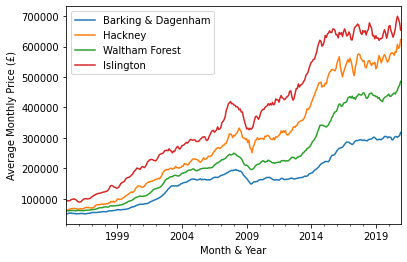

In [39]:
properties.plot(y=['Barking & Dagenham','Hackney', 'Waltham Forest', 'Islington'])
plt.ylabel('Average Monthly Price (£)')
plt.xlabel('Month & Year')
# plt.title('Barking & Dagenham, Hackney, Waltham Forest, and Westminster')

### <span>3. Modeling through simple vectorization operation </span>

- Extract the data for year 1995 over all the 12 months using the feature of dataetime index and compute 1995's **average yearly price**.
- Do the same for the year of 2020.
- Compute the ratio of the two yearly average prices (2020's price divided by 1995's price) for all boroughs, and extract the maximum ratio to identify the London borough that has seen the greatest increase in housing prices, on average, between 1995 and 2020.
- Format the final output result nicely for better presentation and illustration.

In [40]:
# Average 'Yearly' price for all boroughs in 1995 and in 2020, and their ratios
ratio1 = properties.loc['2020'].mean()/properties.loc['1995'].mean()
df1995_2020 = pd.DataFrame([properties.loc['1995'].mean(), properties.loc['2020'].mean(), ratio1])
df1995_2020 = df1995_2020.set_index(pd.Index(['1995','2020', 'ratio']))

# Print the 1995 price, 2020 price, & their ratios by sorting in descending order of ratios, and also format them

#pd.options.display.float_format = '£{:,.2f}'.format
#pd.set_option('display.float_format', lambda x: f'£{x:,.2f}')
#.apply(lambda x: x.astype(float) if np.allclose(x, x.astype(float)) else x)
#df1995_2020.T.sort_values(by=['ratio'], ascending=False).apply(lambda x: x.astype(float) if np.allclose(x, x.astype(float)) else x)
#df1995_2020.T.sort_values(by=['ratio'], ascending=False).style.format('£{:,.2f}',subset=['1995', '2020'])
df1995_2020.T.sort_values(by=['ratio'], ascending=False).style.highlight_max(subset='ratio').format({'1995': '£{:,.2f}', '2020': '£{:,.2f}', 'ratio': '{:,.2f}'})



,1995,2020,ratio
Hackney,"£66,024.48","£585,156.89",8.86
Southwark,"£64,260.05","£509,167.65",7.92
Lambeth,"£68,105.69","£530,038.34",7.78
Waltham Forest,"£61,279.98","£452,266.55",7.38
Tower Hamlets,"£63,652.45","£465,025.45",7.31
Westminster,"£133,689.23","£965,048.12",7.22
Lewisham,"£58,881.77","£423,985.53",7.20
Haringey,"£80,078.49","£559,136.61",6.98
Islington,"£95,555.07","£663,619.22",6.94
Camden,"£120,367.43","£832,577.85",6.92


In [41]:
# Finally spit out which borough of London has seen the greatest increase in housing prices between 1995 and 2020
print(fontstyle.BOLD + fontstyle.BACKGROUNDYELLOW + 'Borough:  ', ratio1.idxmax() + fontstyle.END)
print(fontstyle.BOLD + fontstyle.BACKGROUNDYELLOW + 'Maximum ratio of price: ' + str(ratio1.max().round(2)) + fontstyle.END)


Borough:   Hackney
Maximum ratio of price: 8.86


Text(0, 0.5, '$\\left(\\dfrac{2020\\,\\,\\,\\mathrm{Average}\\,\\,\\,\\mathrm{price}}{1995\\,\\,\\,\\mathrm{Average}\\,\\,\\,\\mathrm{price}}\\right)$')

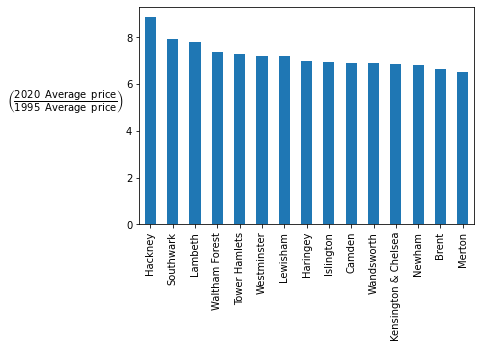

In [42]:
# Plot the top 15 boroughs that have seen the greatest changes in price between 1995 and 2020
top15_1 = ratio1.sort_values(ascending=False).head(15)
ax = top15_1.plot(kind='bar')
ax.set_ylabel(r'$\left(\dfrac{2020\,\,\,\mathrm{Average}\,\,\,\mathrm{price}}{1995\,\,\,\mathrm{Average}\,\,\,\mathrm{price}}\right)$',rotation=0,labelpad=60)


In [43]:
# Similar analysis over the last two decades (i.e., between 2000 and in 2020)
ratio2 = properties.loc['2020'].mean()/properties.loc['2000'].mean()
df2000_2020 = pd.DataFrame([properties.loc['2000'].mean(), properties.loc['2020'].mean(), ratio2])
df2000_2020 = df2000_2020.set_index(pd.Index(['2000','2020', 'ratio']))

# Print the 2000 price, 2020 price, & their ratios by sorting in descending order of ratios
pd.options.display.float_format = '£{:,.2f}'.format
df2000_2020.T.sort_values(by=['ratio'], ascending=False).style.highlight_max(subset='ratio').format({'2000': '£{:,.2f}', '2020': '£{:,.2f}', 'ratio': '{:,.2f}'})


,2000,2020,ratio
Hackney,"£132,727.51","£585,156.89",4.41
Waltham Forest,"£103,030.68","£452,266.55",4.39
Newham,"£92,887.33","£371,741.10",4.00
Lewisham,"£107,082.68","£423,985.53",3.96
Barking & Dagenham,"£77,549.51","£303,024.82",3.91
Haringey,"£145,997.09","£559,136.61",3.83
Westminster,"£260,492.25","£965,048.12",3.70
Greenwich,"£110,162.98","£397,238.70",3.61
Lambeth,"£148,038.78","£530,038.34",3.58
Southwark,"£142,266.73","£509,167.65",3.58


In [44]:
# Finally spit out which borough of London has seen the greatest increase in housing prices between 2000 and 2020

print(fontstyle.BOLD + fontstyle.BACKGROUNDYELLOW + 'Borough:  ', ratio2.idxmax() + fontstyle.END)
print(fontstyle.BOLD + fontstyle.BACKGROUNDYELLOW + 'Maximum ratio of price: ' + str(ratio2.max().round(2)) + fontstyle.END)


Borough:   Hackney
Maximum ratio of price: 4.41


Text(0, 0.5, '$\\left(\\dfrac{2020\\,\\,\\,\\mathrm{Average}\\,\\,\\,\\mathrm{price}}{2000\\,\\,\\,\\mathrm{Average}\\,\\,\\,\\mathrm{price}}\\right)$')

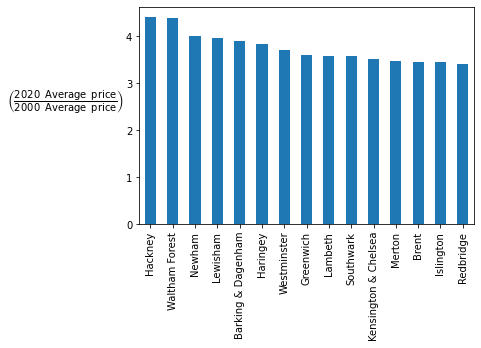

In [45]:
# Plot the top 15 boroughs that have seen the greatest changes in price between 2000 and 2020
top15_2 = ratio2.sort_values(ascending=False).head(15)
ax = top15_2.plot(kind='bar')
ax.set_ylabel(r'$\left(\dfrac{2020\,\,\,\mathrm{Average}\,\,\,\mathrm{price}}{2000\,\,\,\mathrm{Average}\,\,\,\mathrm{price}}\right)$',rotation=0,labelpad=60)


### 4. Conclusion
What can you conclude? Type out your conclusion below. 

Look back at your notebook. Think about how you might summarize what you have done. 

<span style="color:blue">
    <b><u>Conclusion</u></b>: The "Average price" excel sheet available through the free and open data-sharing portal of the London Datastore includes 313 rows and 49 columns indexed by the natural numbers. The 49 columns represent 32 London boroughs, the City of London, 12 other areas in London (which are not boroughs), 3 additional columns of missing elements, and one column of <code>datetime</code> objects. One of the 313 rows includes mostly alhpanumeric IDs and a few missing elements associated with different regions of London. The remaining rows in the datasheet include monthly average price of all houses of each London region from January 1995 to December 2020, i.e., there are [(2020-1995)+1]×12 = <b>312</b> rows consisiting of useful data for further analysis. Therefore, these 312 rows are kept in the final dataset for further analysis. The columns that represent 32 London boroguhs and one column of <code>datetime</code> objects are of interest for this project. So, the rest of the columns were dropped before carrying out the data analysis. Additionally, the natural index of the DataFrame is changed, and the <code>datetime</code> column is set as the index. The <code>datetime</code> column is then deleted from the DataFrame to obtain the final and tidy DataFrame of shape (312 × 32). 
</span>

<span style="color:blue">
    Using the tidy DataFrame as explained above, the average monthly prices for the year 1995 and 2020 are extracted and the corresponding average yearly prices are computed. The ratio of 2020 average price to 1995 average price is a useful metric to detremine which borough has seen the greatest increase in housing prices, on average, from 1995 to 2020 (this ratio, however, does not determine which borough is the most expensive one). The ratios for all the 32 boroughs are reported in a tabular format. The maximum ratio is found to be 8.86 for <mark style="background-color: yellow">Hackney borough</mark>. The 15 boroughs with the top most increase in housing prices are also presented through a <code>bar</code> graph. Four representative <span style="color:black"><em>line plots</em></span> (<b>Average Monthly Price </b> <em>vs</em> <b>Month & Year</b>) are also included in the abobe analysis for Hackney borough, Barking & Dagenham borough, Waltham Forest borough, and Islington borough between 1995 and 2020. It can be observed from the line plots that the prices have increased slowly over the year from 1995 until about 2008, and then decreased slightly for over a year during the Great Depression time, and increased again possibly with a higher rate till 2020.
</span>

<span style="color:blue">
Similar result for price ratios to determine the greatest increase in housing prices is also presented over the last two decades between 2000 and 2020. The <mark style="background-color: yellow">Hackney borough</mark> agains turns out to be the top most one with the corresponding ratio being 4.41. The <code>bar</code> graph for the top most 15 boroughs is also reported. It can be observed here that the <mark style="background-color: yellow">Waltham Forest</mark> borough captures the second spot quantitatively but both Waltham Forest and Hackney boroughs are almost tied. Both of them have practically seen the greatest increase in housing prices over the last two decades. Seperately, it should be noted, as indicated in the previous paragraph, that these two boroughs are <em>not</em> the most expensive boroughs in 2020. The most expensive borough in 2020 is the Kensington & Chelsea borough with average yearly housing price being slightly more than £1.3 million.
</span>